In [3]:
import numpy as np
import pandas as pa
letters_train = pa.read_csv(
    'https://www.labri.fr/perso/zemmari/datasets/emnist/emnist-letters-train.csv',
    header=None)
letters_test = pa.read_csv(
    'https://www.labri.fr/perso/zemmari/datasets/emnist/emnist-letters-test.csv',
    header=None)
def load_letters():
    X_train = np.array(letters_train.iloc[:, 1:785])
    y_train = np.array(letters_train.iloc[:, 0])
    y_train = y_train - 1
    X_test = np.array(letters_test.iloc[:, 1:785])
    y_test = np.array(letters_test.iloc[:, 0])
    y_test = y_test -1 
    X_train = np.reshape(X_train, (X_train.shape[0], 28, 28))
    X_test = np.reshape(X_test, (X_test.shape[0], 28, 28))
    return (X_train, y_train), (X_test, y_test)

# Partie 1

In [4]:
# Question 1
import tensorflow as tf
import keras
from keras.utils import to_categorical
(X_train, y_train), (X_test, y_test) = load_letters()
img_rows, img_cols = X_train.shape[1], X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train  = X_train / 255
X_test  = X_test / 255

unique_classes = np.unique(y_train)
print(unique_classes)

num_classes = unique_classes.size


y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
X_train shape: (88800, 28, 28, 1)
y_train shape: (88800, 26)
X_test shape: (14800, 28, 28, 1)
y_test shape: (14800, 26)


In [8]:
# Question 2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def letter_network():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(26, activation='softmax')) #26 lettres dans l'alphabet
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
model = letter_network()
model.summary()
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))
scores = model.evaluate(X_test, y_test)
print("Total accuracy:", scores[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

ValueError: in user code:

    File "C:\Users\verca\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\verca\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\verca\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\verca\anaconda3\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\verca\anaconda3\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "C:\Users\verca\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\verca\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\verca\anaconda3\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\verca\anaconda3\lib\site-packages\keras\losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\verca\anaconda3\lib\site-packages\keras\backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (100, 2) and (100, 26) are incompatible


In [7]:
def letter_network_2():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(26, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = letter_network_2()
model.summary()
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))
scores = model.evaluate(X_test, y_test)
print("Total accuracy:", scores[1])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 1, 1, 128)       

On voit que dans ce réseau où nous avons rajoutés une couche Conv2D supplémentaire, le total accuracy est plus faible que celui avec seulement 2 couches Conv2D. Ce qui prouve qu'il y a eu un surapprentissage et donc que l'accuracy est plus faible. Donc trop de couches par rapport aux données.

In [5]:
def letter_network_dropout():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25)) # dropout
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25)) # dropout
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5)) # dropout
    model.add(Dense(26, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Dans ce réseau, nous avons rajouté le Dropout qui permet de mettre aléatoirement certains poids du modèle à zéro pendant l'entraînement.

In [6]:
model = letter_network_dropout()
model.summary()
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))
scores = model.evaluate(X_test, y_test)
print("Total accuracy:", scores[1])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)         

On voit donc qu'avec le modèle letter_network, on a pour chaque epoch une meilleure accuracy que sur letter_network_dropout. Mais par contre on a un moins bon total accuracy que sur letter_network_dropout car le réseau a appris des détails des données inutiles et donc sur chaque entrainement a eu un meilleur accuracy.

Sauf que au total on se retrouve avec une accuracy de 91.8% contre 92% avec le dropout. Signe que Dropout aide à prévenir le surapprentissage.

On peut tester une autre structure en utilisant un autre optimizer que "adam", mais dans notre cas cela ne change pas grand chose ou du moins cela n'améliore pas notre accuracy lors de l'entrainement de notre modèle.

# Partie 2

In [5]:
# Question 1
from keras.datasets import mnist
import random
# load des lettres
(X_train_letters, y_train_letters), (X_test_letters, y_test_letters) = load_letters()

for i in range(y_train_letters.size):
    y_train_letters[i] = 0

for i in range(y_test_letters.size):
    y_test_letters[i] = 0

# load des chiffres
(X_train_numbers, y_train_numbers), (X_test_numbers, y_test_numbers) = mnist.load_data()

for i in range(y_train_numbers.size):
    y_train_numbers[i] = 1

for i in range(y_test_numbers.size):
    y_test_numbers[i] = 1

# on concatene les données
X_train = np.concatenate((X_train_letters,X_train_numbers))
y_train = np.concatenate((y_train_letters,y_train_numbers))

X_test = np.concatenate((X_test_letters,X_test_numbers))
y_test = np.concatenate((y_test_letters,y_test_numbers))

# on definit la taille
img_rows, img_cols = X_train.shape[1], X_train.shape[2]

# On reshape en 1D
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

# on transforme y_train et y_test en vecteurs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (148800, 28, 28, 1)
y_train shape: (148800, 2)
X_test shape: (24800, 28, 28, 1)
y_test shape: (24800, 2)


In [10]:
def neural_network0():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(2, kernel_initializer='normal', activation='softmax'))    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = neural_network0()
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5,batch_size=100)
scores = model.evaluate(X_test, y_test)
print("Total accuracy:", scores[1])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 2)                 258       
                                                                 
Total params: 100,738
Trainable params: 100,738
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1488/1488 [==============================] - 11s 6ms/step - loss: 0.2719 - accuracy: 0.9789 - val_loss: 0.0302 - val_accuracy: 0.9927
Epoch 2/5
1488/1488 [==============================] - 7s 5ms/step - loss: 0.0222 - accuracy: 0.9931 - val_loss: 0.0242 - val_accuracy: 0.9929
Epoch 3/5
1488/1488 [====

In [11]:
def neural_network_cnn():
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64,kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = neural_network_cnn()
model.summary()
history = model.fit(X_train, y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test))
scores = model.evaluate(X_test, y_test)
print("Total accuracy:", scores[1])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dense_12 (Dense)            (None, 128)              

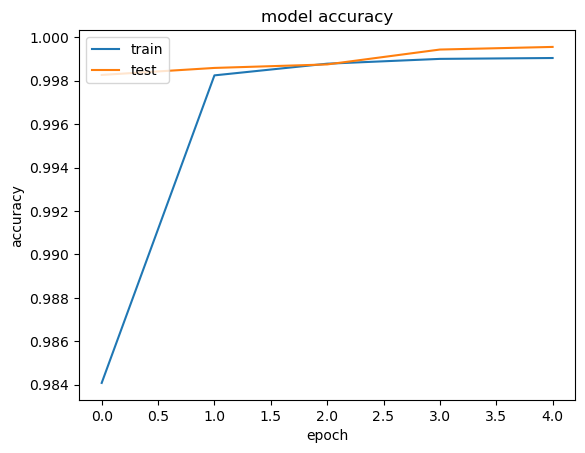

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
def neural_network_deep_cnn():
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64,kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128,kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = neural_network_deep_cnn()
model.summary()
history = model.fit(X_train, y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test))
scores = model.evaluate(X_test, y_test)
print("Total accuracy:", scores[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 1, 1, 128)       

Pour cette partie nous avons choisi 3 architectures différentes, une neutre, une CNN classique et une CNN profonde.

Dans chacune des 3 architectures nous finissons par une couche Dense avec 2 neuronnes afin de représenter les 2 catégories que nous cherchons à distinguer (vetements et accesoires).

Nous avons choisi de faire un réseau neutre pour commencer étant donné que ce n'est pas le type d'architecture le plus adapté pour notre sujet nous ne nous attendions pas d'aussi bons résultats que les deux architectures suivantes. Elle est très rapide et a un modéle très court ce qui la rend pratique mais cependant la précision s'en voit réduite dans cette application.

En effet, CNN est bien plus adapté pour la reconaissance d'image nous avons donc fait deux version, une n'allant pas très loin dans l'apprentissage et l'autre plus. C'est à dire que la non profonde s'arrete à un Conv2D de 64 alors que dans la profonde nous avons ajouté une couche en plus jusqu'à 128.
Le risque étant que cela provoque un surapprentissage a cause de l'architecture plus profonde et cela peut provoquer une baisse de la précision.
Ce qui est exactement le comportement qu'on a pu observer lors de nos tests.

